In [9]:
from os.path import join, isfile
from os import listdir
from PIL import Image
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import csv
import itertools
from scipy.spatial import distance

In [10]:
def get_distances(keypoints):
    feats = []
    
    combs = [comb for comb in itertools.combinations([*range(0, len(keypoints))], 2)]
    for comb in combs:
        a = comb[0]
        b = comb[1]
        
        feats.append(distance.euclidean(keypoints[a], keypoints[b]))
            
    return feats

## From landmark to all distances for syndromic files

In [11]:
GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien"
file = GENERAL_DIR+ "\\features_facereader_landmarks_patient_groups.csv"

syn_rep = []

with open(file, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        landmarks = []
        i = 1
        while i < len(row[1:]):
            landmarks.append((float(row[i]), float(row[i+1]), float(row[i+2])))
            i+=3    
            
        feats = get_distances(landmarks)
        syn_rep.append([row[0]] + feats)
        
# location to save representation
csv_file_syn = GENERAL_DIR+ "\\features_facereader_landmarks_distances_patient_groups.csv"

# save representation of kdv patients
with open(csv_file_syn, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(syn_rep)

## From landmark to all distances for control files

In [13]:
GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien"
file = GENERAL_DIR+ "\\features_facereader_landmarks_all_controls.csv"

ID_rep = []

with open(file, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        landmarks = []
        i = 1
        while i < len(row[1:]):
            landmarks.append((float(row[i]), float(row[i+1]), float(row[i+2])))
            i+=3    
            
        feats = get_distances(landmarks)
        ID_rep.append([row[0]] + feats)
        
# location to save representation
csv_file_ID = GENERAL_DIR+ "\\features_facereader_landmarks_distances_all_controls.csv"

# save representation of kdv patients
with open(csv_file_ID, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(ID_rep)

In [93]:


def fr_plot(patient):
    face_x = []
    face_y = []
    face_z = []

    GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien"
    file = GENERAL_DIR+ "\\features_facereader_landmarks_patient_groups.csv"

    with open(file, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if patient in row[0]:
                print(row[0])
                i = 1
                while i < len(row[1:]):
                    face_x.append(float(row[i]))
                    face_y.append(-float(row[i+1]))
                    face_z.append(float(row[i+2]))
                    i+=3    
                break
    face_x = np.array(face_x)
    face_y = np.array(face_y)
    face_z = np.array(face_z)
    return face_x, face_y, face_z

KDVS_2.jpg


<IPython.core.display.Javascript object>


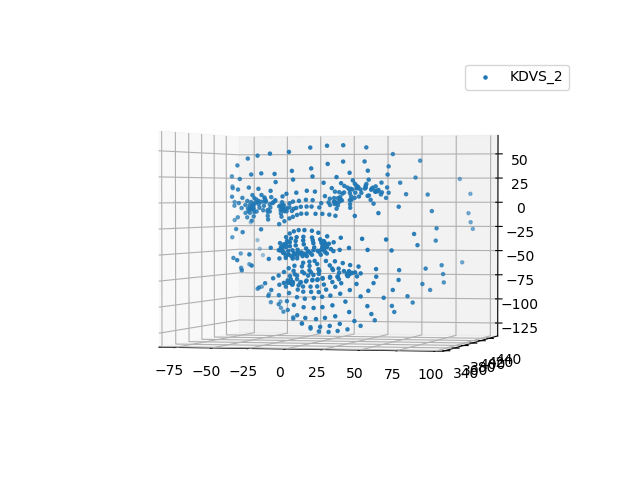

In [94]:
%matplotlib notebook
patient = "KDVS_2"
x, y, z = fr_plot(patient)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, z, y, s = 5, label=patient)
ax.legend()

plt.show()
